In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
customer_in = pd.Series([0])
customer_out = pd.Series([0])
station1 = 0
station2 = 0
customer = 0
start_customer = 0
finish_customer = 0
clock = 0

next_arrival = np.random.exponential(1.8)
next_station1_1 = 1e10
next_station1_2 = 1e10
next_station2 = 1e10

In [3]:
#for i in range(4000):
while finish_customer < 4000:
    clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

    if next_arrival == clock:
        station1 += 1
        customer += 1
        start_customer += 1
        customer_in[start_customer] = clock
    elif next_station1_1 == clock:
        station1 -= 1
        station2 += 1
    elif next_station1_2 == clock:
        station1 -= 1
        station2 += 1
    elif next_station2 == clock:
        #station1
        station2 -= 1
        customer -= 1
        finish_customer += 1
        customer_out[finish_customer] = clock



    next_arrival = clock + np.random.exponential(1.8)

    if station1 >= 2:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + np.random.exponential(1)
    elif station1 > 0:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + 1e10
    else:
        next_station1_1 = clock + 1e10
        next_station1_2 = clock + 1e10

    if station2 > 0:
        next_station2 = clock + np.random.exponential(1/2)
    else:
        next_station2 = clock + 1e10

In [4]:
sojourn_time = customer_out - customer_in


In [5]:
warmed_sojourn_time = sojourn_time[1000:4000]


(array([578., 962., 708., 411., 197.,  86.,  29.,  23.,   5.,   1.]),
 array([0.01530657, 0.80181258, 1.58831859, 2.3748246 , 3.16133061,
        3.94783662, 4.73434263, 5.52084864, 6.30735465, 7.09386066,
        7.88036667]),
 <BarContainer object of 10 artists>)

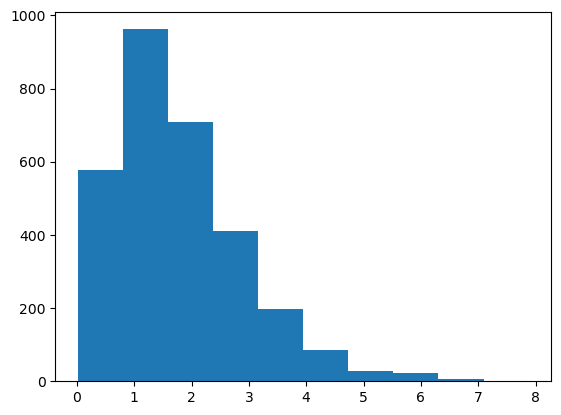

In [6]:
plt.hist(warmed_sojourn_time)
